In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from playsound import playsound

In [20]:
plt.rcParams['figure.figsize']=[16,12]
plt.rcParams.update({'font.size': 18})

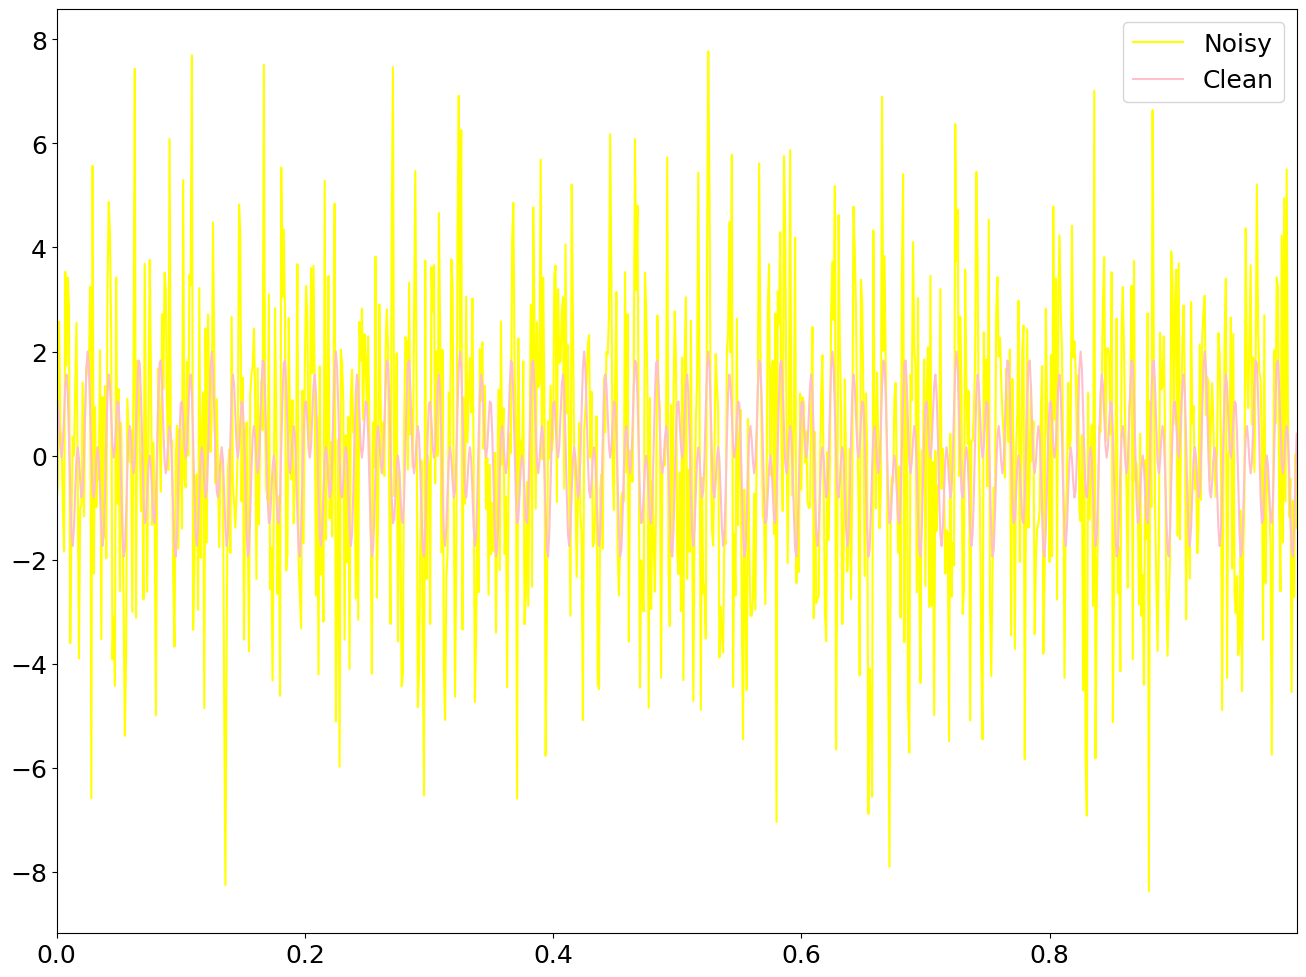

In [21]:
#create a simple signal with 2 frequencies
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.cos(2*np.pi*120*t)
f_clean=f
f=f+2.5*np.random.randn(len(t))

#plot f_clean and f
plt.plot(t,f,color='yellow',label='Noisy')
plt.plot(t,f_clean,color='pink',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

write("enoise.wav", 44100, f.astype(np.int16))
playsound('enoise.wav')

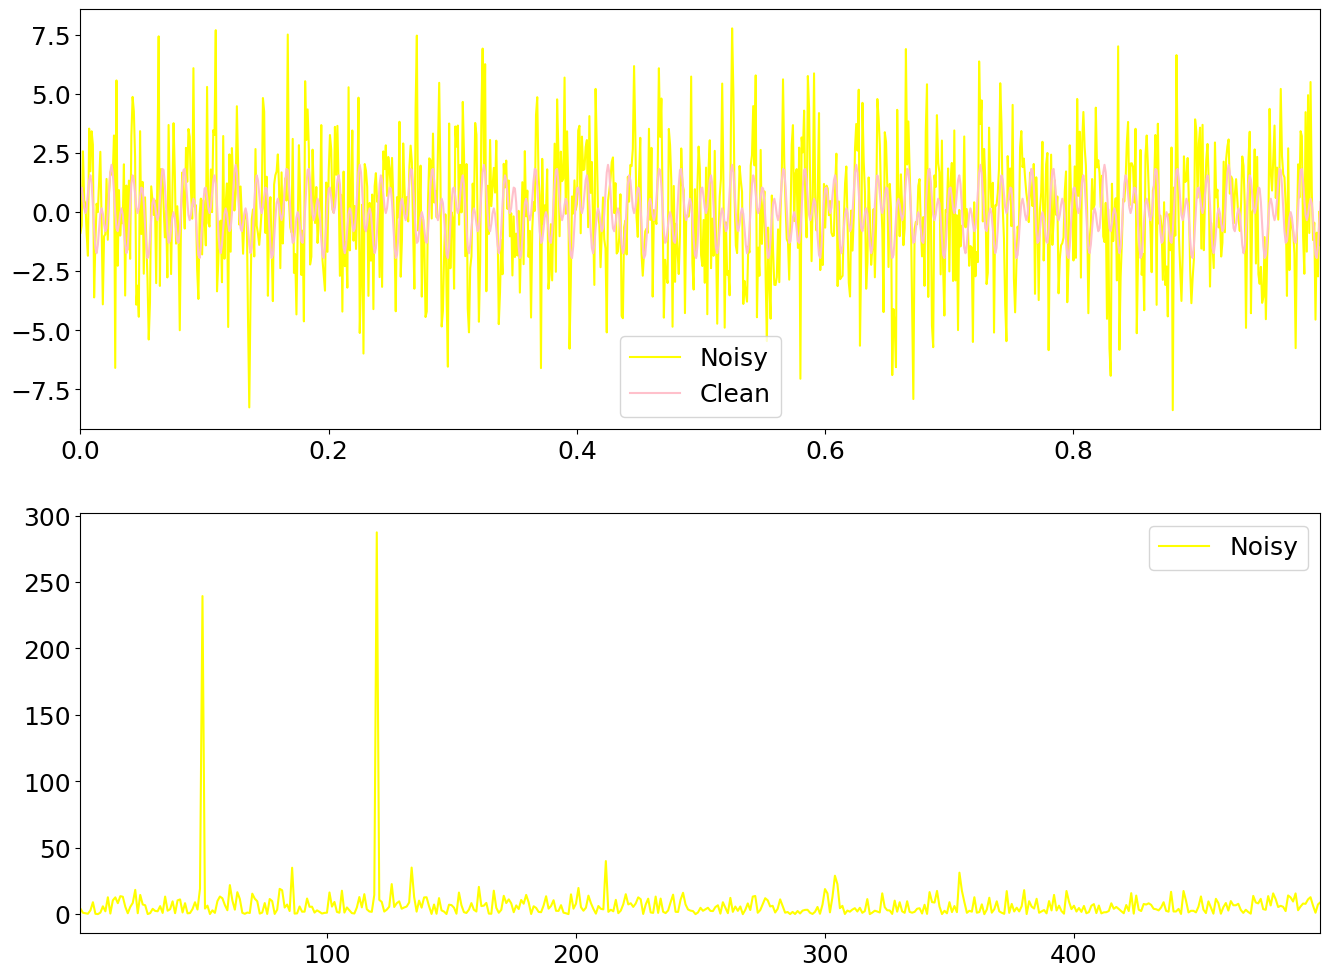

In [22]:
#compute the fft
n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat*np.conj(fhat)/n
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

#plt
fig,axs=plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='yellow',label='Noisy')
plt.plot(t,f_clean,color='pink',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='yellow',label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [23]:
#use the PSD to filter out noise
indices=PSD>100
PSDclean=PSD*indices
fhat=fhat*indices
ffilt=np.fft.ifft(fhat)

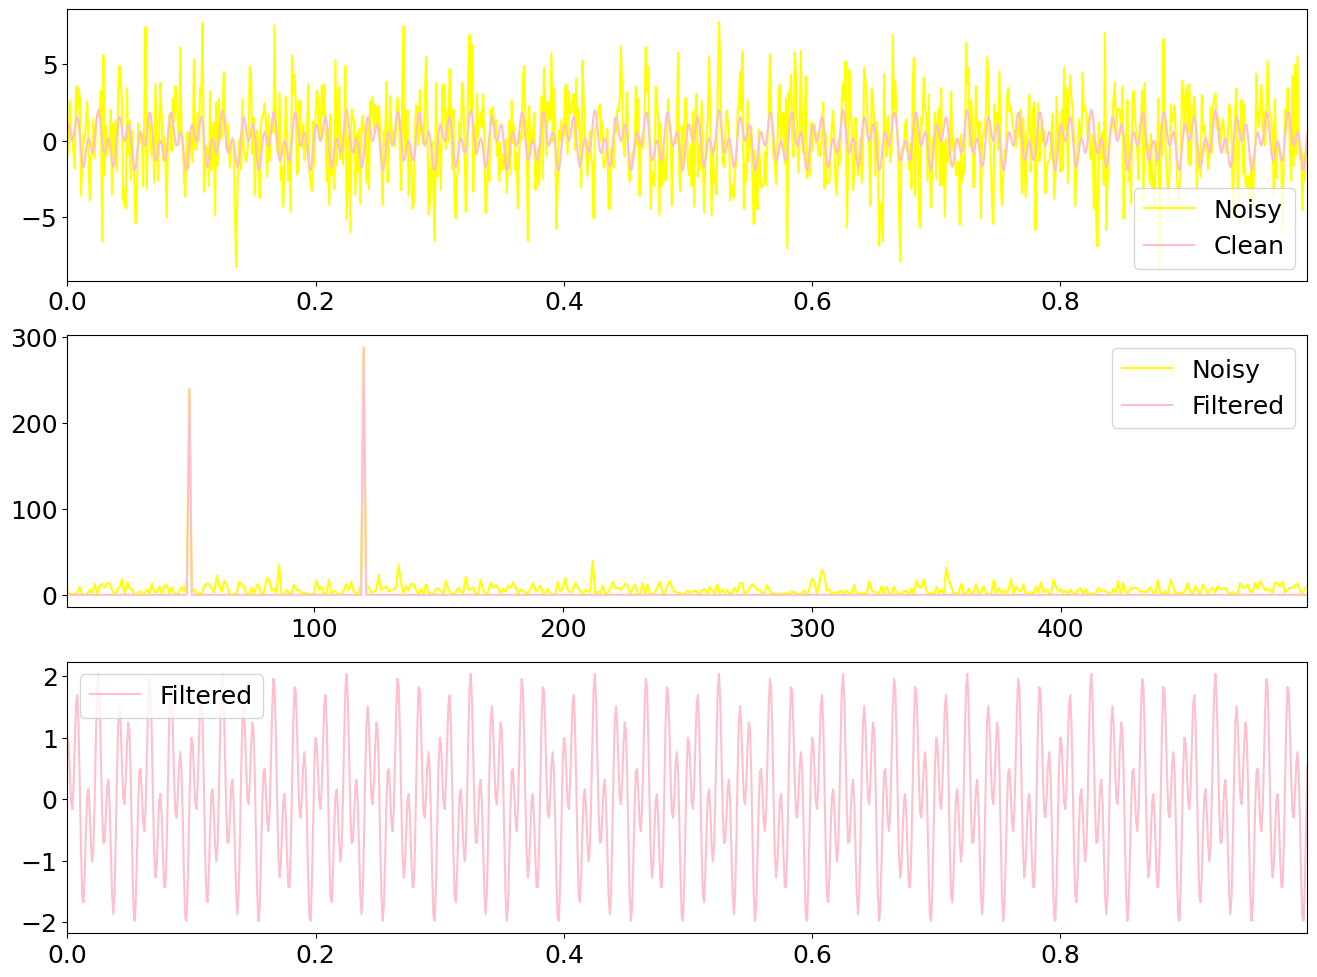

/var/folders/wf/606tgcgx6rq99xkrjhnpc30m0000gn/T/ipykernel_49078/782925211.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  write("eresult.wav", 44100, ffilt.astype(np.int16))


In [24]:
#plot everything together
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='yellow',label='Noisy')
plt.plot(t,f_clean,color='pink',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='yellow',label='Noisy')
plt.plot(freq[L],PSDclean[L],color='pink',label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[2])
plt.plot(t,ffilt,color='pink',label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()

write("eresult.wav", 44100, ffilt.astype(np.int16))
playsound('eresult.wav')

In [29]:
playsound('example.wav')